# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Beatrics Sahcayani Purba]
- **Email:** [beatricsspurba@gmail.com]
- **ID Dicoding:** [beatrics11]

## Menentukan Pertanyaan Bisnis

Dari proses analisis yang dilakukan maka akan ditemukan jawaban dari masing-masing pertanyaan berikut ini

- Bagaimana perbandingan penyewaan sepeda pada hari kerja dengan hari weekend?
- Bagaimana pengaruh cuaca terhadap banyaknya penyewa sepeda?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

## Data Wrangling

Data wrangling merupakan sebuah proses atau kumpulan kegiatan yang meliputi pengumpulan data (Gathering data), penilaian data (Assessing data), serta pembersihan data (Cleaning data) sebelum data digunakan dalam proses analisis data

### Gathering Data

Pada proses ini kita akan mengumpulkan semua data yang dibutuhkan untuk menjawab semua pertanyaan atau masalah bisnis yang ingin kita hadapi.

In [2]:
# This is use to show data in day.csv
for_day_df = pd.read_csv("day.csv", delimiter=",")
for_day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
# This is use to show data in hour.csv
for_hour_df = pd.read_csv("hour.csv", delimiter=",")
for_hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight from the process:**
- Dari dataset tersebut terdapat dua data table yang digunakan untuk proses analisis data

### Assessing Data

Proses ini dilakukan untuk menilai kualitas dan struktur dari sebuah data. Selain itu, proses ini juga bertujuan untuk mengidentifikasi berbagai masalah yang terdapat dalam data, seperti missing value, unstandard value, dll.

#### Show The Data Type From Dataset

In [4]:
# Show all of the data types in each variable
print("Data type of each variable in day.csv\n")
for_day_df_datatypes = for_day_df.dtypes
print(for_day_df_datatypes)

print("\nData type of each variable in hour.csv")
for_hour_df_datatypes = for_hour_df.dtypes
print(for_hour_df_datatypes)

Data type of each variable in day.csv

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

Data type of each variable in hour.csv
instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object


**Insight:**
- Tipe data dari setiap variebel ada yang merupakan integer, object dan juga float
- Terdapat variabel dteday dan berarti memungkinkan jika dilakukan analisis deret waktu

#### Setelah mengetahui tipe data dari setiap variabel, maka dilakukan identifikasi untuk mengetahui masalah yang mungkin ada dari dataset tersebut

#### Detecting The Missing Value

In [5]:
for_day_df.isnull().sum()
for_hour_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Tidak ditemukan adanya missing value pada kedua tabel data tersebut**

#### Detecting The Duplicate Data

In [6]:
# Show duplicated data in day.csv
day_duplicated_rows = for_day_df[for_day_df.duplicated()]

if day_duplicated_rows.empty:
    print("There is no duplicated data in day.csv")
else:
    print(f"There is {len(day_duplicated_rows)}duplicated data")
    print("\n Data duplikat:")
    print(day_duplicated_rows)

# Show duplicated data in hour.csv
hour_duplicated_rows = for_hour_df[for_hour_df.duplicated()]

if hour_duplicated_rows.empty:
    print("\nThere is no duplicated data in hour.csv")
else:
    print(f"There is {len(hour_duplicated_rows)}duplicated data")
    print("\n Data duplikat:")
    print(hour_duplicated_rows)


There is no duplicated data in day.csv

There is no duplicated data in hour.csv


**Tidak ada data duplikat dari kedua data tersebut**

#### Checking The Statistic Value

In [7]:
for_day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [8]:
for_hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Tidak ada nilai yang anomali pada kedua data tabel tersebut**

### Cleaning Data

Tujuan dari proses cleaning data adalah untuk memperbaiki atau menghapus kesalahan pada data, ketidakkonsistenan dan ketidakakuratan pada data. Selain itu pada proses ini juga kita mempersiapkan data untuk dapat digunakan untuk proses analisis. 

#### Pemahaman Data dan Validasi Data

Pada tahap pemahaman data, dilakukan eksplorasi awal terhadap dataset. Kolom-kolom yang tidak relevan dengan analisis dihapus. Tipe data dari setiap kolom diperiksa dan diubah sesuai kebutuhan untuk memastikan akurasi analisis. Selain itu, nama kolom juga diubah menjadi nama yang lebih deskriptif agar mudah dipahami. Selanjutnya, pada tahap validasi data, dilakukan transformasi data kategorikal menjadi bentuk yang lebih mudah dibaca. Nilai numerik yang merepresentasikan kategori, seperti hari dalam seminggu dan tingkat kelembaban, dikategorikan menjadi label teks untuk memudahkan interpretasi.

##### Transformasi Data #####

**- Mengubah tipe data agar sesuai kebutuhan**

Pada kedua data tabel tersebut, ternyata masih ada variabel dengan tipe data yang tidak sesuai dengan yang kita butuhkan. Untuk itu perlu dilakukan pengubahan terhadap tipe data tersebut agar dapat digunakan untuk proses analisis. Beberapa variabel yang harus diubah tipe datanya yakni "dteday" (dari yang bersifat obect seharusnya ke bentuk tanggal dan waktu / datetime), season, month, holiday, weekday, weathersit, workingday (dari tipe integer seharusnya ke tipe kategorikal).

In [9]:
# Change "dteday" to datetime data type
for_day_df['dteday'] = pd.to_datetime(for_day_df['dteday'], format='%Y-%m-%d')
for_hour_df['dteday'] = pd.to_datetime(for_hour_df['dteday'], format='%Y-%m-%d')

In [10]:
# Change "season", "mnth", "holiday", "weekday", "weathershit", "workday" to catgorical data type
variables = ['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
for df in [for_day_df, for_hour_df]:
    df[variables] = df[variables].apply(lambda x: pd.Categorical(x))

**- Mengubah nilai yang berupa angka menjadi kategori agar mudah dibaca**

In [11]:
# Define a dictionary for season conversion
season_category = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}

# Define a dictionary for year conversion
year_category = {0: '2011', 1: '2012'}

# Define a dictionary for month conversion
month_category = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}

# Define a dictionary for weather condition conversion
weather_category = {
    1: 'Clear', 2: 'Misty', 3: 'Light_rainsnow', 4: 'Heavy_rainsnow'
}

# Define a dictionary for day of the week conversion
day_of_week_category = {
    0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'
}

# Apply the conversions to both DataFrames
for df in [for_day_df, for_hour_df]:
    df['season'] = df['season'].map(season_category)
    df['yr'] = df['yr'].map(year_category)
    df['mnth'] = df['mnth'].map(month_category)
    df['weathersit'] = df['weathersit'].map(weather_category)
    df['one_of_week'] = df['weekday'].map(day_of_week_category)
    df['hum'] = df['hum'] * 100

**- Mengubah nama variabel agar mudah dibaca**

In [12]:
# Define the old and new variable names
old_names = ['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt', 'hr']
new_names = ['instantaneous', 'date_of_day', 'season_of_year', 'year', 'month', 'is_holiday', 'day_of_week', 'is_working_day', 'weather_situation', 'temperature', 'actual_temperature', 'humidity', 'wind_speed', 'casual_users', 'registered_users', 'count', 'hour']

# Create a dictionary mapping old names to new names
name_mapping = dict(zip(old_names, new_names))

# Apply the name mapping to both DataFrames
for_day_df = for_day_df.rename(columns=name_mapping)
print(for_day_df.head())
for_hour_df = for_hour_df.rename(columns=name_mapping)
print(for_hour_df.head())

   instantaneous date_of_day season_of_year  year month is_holiday  \
0              1  2011-01-01         Spring  2011   Jan          0   
1              2  2011-01-02         Spring  2011   Jan          0   
2              3  2011-01-03         Spring  2011   Jan          0   
3              4  2011-01-04         Spring  2011   Jan          0   
4              5  2011-01-05         Spring  2011   Jan          0   

  day_of_week is_working_day weather_situation  temperature  \
0           6              0             Misty     0.344167   
1           0              0             Misty     0.363478   
2           1              1             Clear     0.196364   
3           2              1             Clear     0.200000   
4           3              1             Clear     0.226957   

   actual_temperature  humidity  wind_speed  casual_users  registered_users  \
0            0.363625   80.5833    0.160446           331               654   
1            0.353739   69.6087    0.24853

**- Menambah Variabel Baru Untuk Mengklasifikasi Hari Dan Kelembapan**

In [13]:
# Membuat kolom baru bernama category_days
one_of_week = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
def get_category_of_days(one_of_week):
    if one_of_week in ["Saturday", "Sunday"]:
        return "weekend"
    else: 
        return "weekdays"

for_day_df["category_of_days"] = for_day_df["one_of_week"].apply(get_category_of_days)
for_hour_df["category_of_days"] = for_hour_df["one_of_week"].apply(get_category_of_days)

In [14]:
def classify_humidity(humidity):
    if humidity < 45:
        return "Terlalu kering"
    elif humidity >= 45 and humidity < 65:
        return "Ideal"
    else:
        return "Terlalu Lembab"

for_day_df["category_of_humidity"] = for_day_df["humidity"].apply(classify_humidity)
for_hour_df["category_of_humidity"] = for_hour_df["humidity"].apply(classify_humidity)

##### Pembersihan Data yang tidak digunakan #####

Menghapus variabel yang tidak digunakan dalam analisis data sangat penting karena dapat meningkatkan efisiensi komputasi, mencegah model menjadi terlalu kompleks, dan meningkatkan akurasi hasil analisis dengan mengurangi noise atau gangguan dalam data. Variabel yang akan dihapus dari data ini adalah instan dan windspeed karena tidak digunakan untuk menjawab pertanyaan analisis.

In [15]:
drop_cols_days = ['instantaneous', 'wind_speed']
drop_cols_hour = ['wind_speed']

for_day_df.drop(columns=drop_cols_days, inplace=True)
for_hour_df.drop(columns=drop_cols_hour, inplace=True)

for_day_df.head()
for_hour_df.head()

,instantaneous,date_of_day,season_of_year,year,month,hour,is_holiday,day_of_week,is_working_day,weather_situation,temperature,actual_temperature,humidity,casual_users,registered_users,count,one_of_week,category_of_days,category_of_humidity
0,1,2011-01-01,Spring,2011,Jan,0,0,6,0,Clear,0.24,0.2879,81.0,3,13,16,Saturday,weekend,Terlalu Lembab
1,2,2011-01-01,Spring,2011,Jan,1,0,6,0,Clear,0.22,0.2727,80.0,8,32,40,Saturday,weekend,Terlalu Lembab
2,3,2011-01-01,Spring,2011,Jan,2,0,6,0,Clear,0.22,0.2727,80.0,5,27,32,Saturday,weekend,Terlalu Lembab
3,4,2011-01-01,Spring,2011,Jan,3,0,6,0,Clear,0.24,0.2879,75.0,3,10,13,Saturday,weekend,Terlalu Lembab
4,5,2011-01-01,Spring,2011,Jan,4,0,6,0,Clear,0.24,0.2879,75.0,0,1,1,Saturday,weekend,Terlalu Lembab


**Insight:**
- Sekarang hanya tersisa data-data yang digunakan untuk analisis
- Banyak data yang tipe data awalnya belum sesuai untuk dilakukan analisis dan dengan proses data cleaning kita mempersiapkan data itu agar sesuai dan bisa digunakan
- Data yang bersifat kategorikal dapat dikelompokkan lagi sesuai kebutuhan

## Exploratory Data Analysis (EDA)

EDA merupakan tahap eksplorasi data yang telah dibersihkan guna memperoleh insight dan menjawab pertanyaan analisis.

In [16]:
# Menampilkan rangkuman statistik dari data di DataFrame Day
summary_day = for_day_df.describe(include="all")

# Menampilkan hasilnya dengan format yang lebih rapi
print("Rangkuman Statistik Data Day:")
print(summary_day)

Rangkuman Statistik Data Day:
                date_of_day season_of_year  year month  is_holiday  \
count                   731            731   731   731       731.0   
unique                  731              4     2    12         2.0   
top     2011-01-01 00:00:00           Fall  2012   Jan         0.0   
freq                      1            188   366    62       710.0   
first   2011-01-01 00:00:00            NaN   NaN   NaN         NaN   
last    2012-12-31 00:00:00            NaN   NaN   NaN         NaN   
mean                    NaN            NaN   NaN   NaN         NaN   
std                     NaN            NaN   NaN   NaN         NaN   
min                     NaN            NaN   NaN   NaN         NaN   
25%                     NaN            NaN   NaN   NaN         NaN   
50%                     NaN            NaN   NaN   NaN         NaN   
75%                     NaN            NaN   NaN   NaN         NaN   
max                     NaN            NaN   NaN   NaN      

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_38848\2073877420.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  summary_day = for_day_df.describe(include="all")


DataFrame yang digunakan ini berisikan data peminjaman yang dicatat sejak tanggal 01 Januari 2011 hingga 31 Desember 2012 atau dalam waktu 2 tahun. Periode pencatatan dilakukan setiap hari (terbukti dari unique pada date of day menunjukkan 731 yang berarti jumlah hari dalam 2 tahun tersebut). 

Kita juga bisa melihat penyewaan yang terjadi di setiap tahunnya

In [17]:
# Jumlah penyewaan tiap season 

for_day_df.groupby(by="year")["count"].sum().sort_values(ascending=False).reset_index().head()

,year,count
0,2012,2049576
1,2011,1243103


Dapat diketahui bahwa jumlah penyewaan yang terjadi pada tahun 2012 yakni sebesar 2049576 jauh lebih besar daripada 2011 dengan penyewaan sebesar 1243103

In [18]:
# Menampilkan rangkuman statistik dari data di DataFrame Day
summary_hour = for_hour_df.describe(include="all")

# Menampilkan hasilnya dengan format yang lebih rapi
print("Rangkuman Statistik Data Hour:")
print(summary_hour)

Rangkuman Statistik Data Hour:
        instantaneous          date_of_day season_of_year   year  month  \
count      17379.0000                17379          17379  17379  17379   
unique            NaN                  731              4      2     12   
top               NaN  2011-01-01 00:00:00           Fall   2012    May   
freq              NaN                   24           4496   8734   1488   
first             NaN  2011-01-01 00:00:00            NaN    NaN    NaN   
last              NaN  2012-12-31 00:00:00            NaN    NaN    NaN   
mean        8690.0000                  NaN            NaN    NaN    NaN   
std         5017.0295                  NaN            NaN    NaN    NaN   
min            1.0000                  NaN            NaN    NaN    NaN   
25%         4345.5000                  NaN            NaN    NaN    NaN   
50%         8690.0000                  NaN            NaN    NaN    NaN   
75%        13034.5000                  NaN            NaN    NaN    N

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_38848\459490255.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  summary_hour = for_hour_df.describe(include="all")


Dari data tersebut kita bisa mengetahui bahwa ada 17379 transaksi selama 2 tahun tersebut dengan peminjaman terbanyak pada hari kerja (weekdays).

Kita juga dapat melihat pada jam berapa sepeda paling banyak disewa

In [19]:
# Sewa berdasarkan jam
sewa_berdasarkan_jam = for_hour_df.groupby(by="hour")["count"].sum().reset_index()
print("Sewa Berdasarkan Jam:")
print(sewa_berdasarkan_jam)

Sewa Berdasarkan Jam:
    hour   count
0      0   39130
1      1   24164
2      2   16352
3      3    8174
4      4    4428
5      5   14261
6      6   55132
7      7  154171
8      8  261001
9      9  159438
10    10  126257
11    11  151320
12    12  184414
13    13  184919
14    14  175652
15    15  183149
16    16  227748
17    17  336860
18    18  309772
19    19  226789
20    20  164550
21    21  125445
22    22   95612
23    23   63941


Dari data tersebut diketahui bahwa penyewaan sepeda paling banyak dilakukan pada pukul 17.00 dan paling sedikit pada pukul 04.00

In [20]:
# Sewa berdasarkan hari
sewa_berdasarkan_hari = for_hour_df.groupby(by="one_of_week")["count"].sum().reset_index()
print("Sewa Berdasarkan Hari:")
print(sewa_berdasarkan_hari)

Sewa Berdasarkan Hari:
  one_of_week   count
0      Sunday  444027
1      Monday  455503
2     Tuesday  469109
3   Wednesday  473048
4    Thursday  485395
5      Friday  487790
6    Saturday  477807


Dari data tersebut diketahui bahwa penyewaan sepeda paling banyak dilakukan pada hari Jumat (Friday) dan paling sedikit pada hari Minggu (Sunday)

**Insight yang ditemukan:**
- Transaksi paling banyak terjadi pada musim gugur (Fall)
- Tahun 2012 transaksi yang terjadi lebih banyak daripada 2011
- Orang-orang umumnya menyewa sepeda pada hari kerja (weekdays)

## Visualization & Explanatory Analysis

Visualisasi data merupakan cara kita dalam menyajikan data dalam bentuk visual. Hal ini dilakukan untuk mempermudah kita dan orang lain dalam memahami data tersebut. Selain itu, visualisasi data yang baik juga akan sangat membantu kita dalam menyampaikan story dan pesan dari sebuah data.

### Pertanyaan 1:

**Bagaimana perbandingan penyewaan sepeda pada hari kerja dengan hari weekend?**

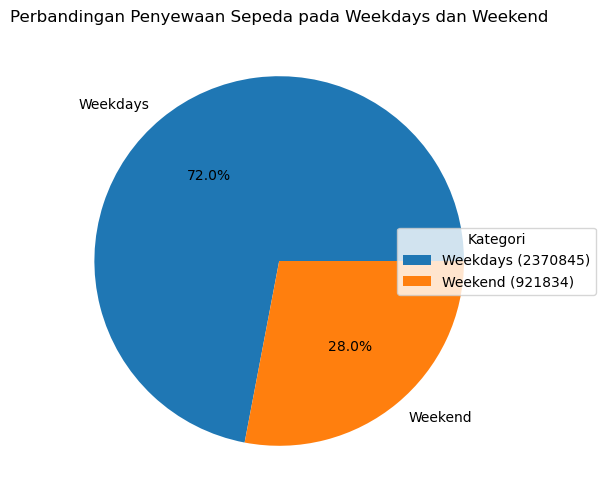

In [21]:
# Membuat pie chart perbandingan penyewaan sepeda pada weekdays dan weekend
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
values = for_hour_df.groupby('category_of_days')['count'].sum()
plt.pie(values, labels=['Weekdays', 'Weekend'], autopct='%1.1f%%')
plt.title('Perbandingan Penyewaan Sepeda pada Weekdays dan Weekend')
plt.legend(title='Kategori', labels=[f'Weekdays ({values[0]})', f'Weekend ({values[1]})'], bbox_to_anchor=(1.2, 0.5), loc='center right')
plt.show()

Dari grafik tersebut kita bisa melihat ada perbedaan yang sangat besar berkaitan dengan hari-hari dimana orang biasa menyewa sepeda. Sebanyak 72% transaksi penyewaan yang terjadi dilakukan pada hari kerja (Weekdays) dan sisanya yakni 28% dilakukan pada hari akhir pekan (Weekend)

### Pertanyaan 2:

**Bagaimana pengaruh cuaca terhadap banyaknya penyewa sepeda?**

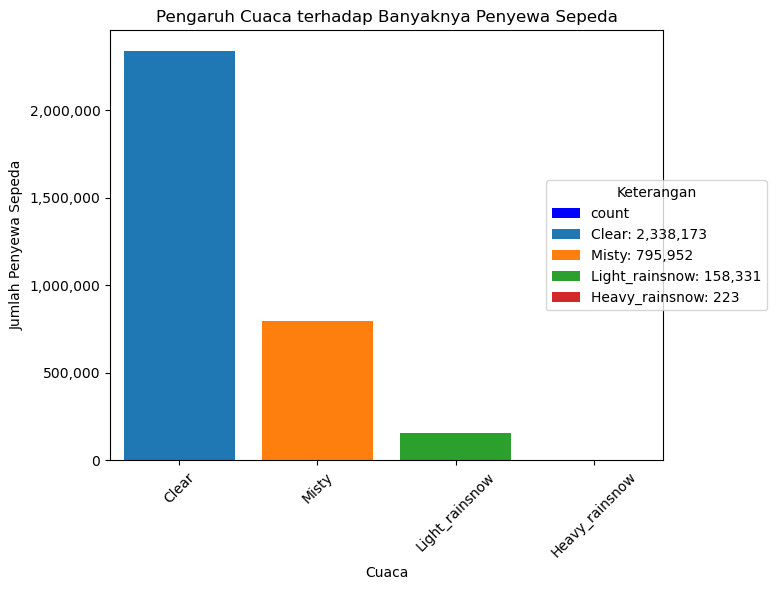

In [22]:
# Membuat bar chart
plt.figure(figsize=(8,6))
for_hour_df.groupby('weather_situation')['count'].sum().plot(kind='bar', color=['blue', 'green', 'red', 'yellow', 'purple'])

# Tambahkan label untuk setiap bar
labels = [f"{k}: {v:,}" for k, v in zip(for_hour_df.groupby('weather_situation')['count'].sum().index, for_hour_df.groupby('weather_situation')['count'].sum().values)]
for i, label in enumerate(labels):
    plt.bar(for_hour_df.groupby('weather_situation')['count'].sum().index[i], for_hour_df.groupby('weather_situation')['count'].sum().values[i], label=label)

plt.xlabel('Cuaca')
plt.ylabel('Jumlah Penyewa Sepeda')
plt.title('Pengaruh Cuaca terhadap Banyaknya Penyewa Sepeda')
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# Tambahkan legenda
plt.legend(bbox_to_anchor=(1.2, 0.5), loc='center right', title='Keterangan')

plt.tight_layout()
plt.show()

Dari grafik tersebut kita bisa melihat bahwa cuaca yang terjadi disetiap harinya berpengaruh terhadap banyaknya penyewaan sepeda yang terjadi. Penyewaan sepeda sangat tinggi saat cuaca sedang cerah, disusul dengan saat cuaca berawan dan paling sedikit saat hujan lebat atau sangat bersalju.

**Insight:**
- TIngkat kegiatan (produktivitas) berpengaruh terhadap penyewaan sepeda. Pada hari kerja terjadi banyak penyewaan sepeda kemungkinan karena harus bepergian ke banyak tempat seperti tempat kerja, sekolah atau bahkan sekadar belanja untuk kebutuhan di rumah
- Cuaca juga berpengaruh terhadap banyaknya penyewaan sepeda yang dilakukan. Semakin baik kondisi cuaca maka semakin banyak orang yang menyewa sepeda. Hal ini sangat realistis karena orang memilih bersepeda karena lebih praktis dan juga menyehatkan, namun apabila cuaca buruk tetap bersepada akan menyulitkan atau bahkan membahayakan

## Analisis Lanjutan (RFM Analysis)

In [23]:
current_date = max(for_hour_df['date_of_day'])
rfm_df = for_hour_df.drop_duplicates(subset=['registered_users', 'date_of_day']).groupby('registered_users').agg({
    'date_of_day': lambda x: (current_date - x.max()).days,  # Recency
    'instantaneous' :'count', #Frequency
    'count': 'sum'  # Monetary
}).reset_index()

# Mengganti nama kolom
rfm_df.columns = ['registered', 'Recency', 'Frequency', 'Monetary']

# Tampilkan hasil
print(rfm_df.head())

   registered  Recency  Frequency  Monetary
0           0       38         23        34
1           1        0        155       230
2           2        1        206       553
3           3        0        245       982
4           4        3        267      1413


## Conclusion

- Masih memungkinkan dilakukan analisis lebih dalam lagi untuk mendapatkan insight baru dari dataset ini.